In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
data = pd.read_csv('mss_repdata.tab', delimiter='\t')

In [29]:
data

,ccode,year,country_name,country_code,GPCP,GPCP_l,GPCP_l2,GPCP_g,GPCP_g_l,GPCP_g_fl,...,muni,state,author,stconst,fh_civ,fh_pol,S,W,WoverS,soc
0,540,1981,Angola,AGO,839.21576,911.84730,1021.77686,-0.079653,-0.107587,0.155680,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
1,540,1982,Angola,AGO,969.86456,839.21576,911.84730,0.155680,-0.079653,-0.034482,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
2,540,1983,Angola,AGO,936.42163,969.86456,839.21576,-0.034482,0.155680,0.059925,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
3,540,1984,Angola,AGO,992.53625,936.42163,969.86456,0.059925,-0.034482,-0.018277,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
4,540,1985,Angola,AGO,974.39610,992.53625,936.42163,-0.018277,0.059925,0.216019,...,0.0,1.0,NaN,NaN,0.000000,0.000000,1.0,0.5,0.500712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,552,1995,Zimbabwe,ZWE,493.44846,465.00010,680.72240,0.061179,-0.316902,0.513642,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
739,552,1996,Zimbabwe,ZWE,746.90424,493.44846,465.00010,0.513642,0.061179,0.044380,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
740,552,1997,Zimbabwe,ZWE,780.05194,746.90424,493.44846,0.044380,0.513642,-0.181482,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0
741,552,1998,Zimbabwe,ZWE,638.48640,780.05194,746.90424,-0.181482,0.044380,0.094420,...,NaN,0.0,NaN,NaN,0.333333,0.333333,1.0,0.5,0.500712,0.0


In [30]:
print(data.columns.to_list())

['ccode', 'year', 'country_name', 'country_code', 'GPCP', 'GPCP_l', 'GPCP_l2', 'GPCP_g', 'GPCP_g_l', 'GPCP_g_fl', 'GPCP_d', 'GPCP_d_l', 'GPCP_df_mean', 'GPCP_df_mean_l', 'GPCP_df_mean_l2', 'NCEP', 'NCEP_l', 'NCEP_l2', 'NCEP_g', 'NCEP_g_l', 'NCEP_g_fl', 'NCEP_d', 'NCEP_d_l', 'NCEP_df_mean', 'NCEP_df_mean_l', 'NCEP_df_mean_l2', 'sm_obs', 'FAO', 'FAO_l', 'FAO_l2', 'FAO_g', 'FAO_g_l', 'FAO_g_fl', 'FAO_d', 'FAO_d_l', 'FAO_df_mean', 'FAO_df_mean_l', 'FAO_df_mean_l2', 'NDVI', 'NDVI_l', 'NDVI_l2', 'NDVI_g', 'NDVI_g_l', 'NDVI_g_fl', 'NDVI_d', 'NDVI_d_l', 'NDVI_df_mean', 'NDVI_df_mean_l', 'NDVI_df_mean_l2', 'type3', 'type4', 'war_prio', 'minor_prio', 'any_prio', 'war_prio_on', 'minor_prio_on', 'any_prio_on', 'war_prio_off', 'minor_prio_off', 'any_prio_off', 'wars', 'war', 'warl', 'onset', 'ended', 'waryrs', 'pop', 'lpop', 'polity2', 'gdpen', 'gdpenl', 'lgdpenl1', 'lpopl1', 'colbrit', 'colfra', 'mtnest', 'lmtnest', 'Oil', 'ncontig', 'ethfrac', 'ef', 'relfrac', 'nwstate', 'polity2l', 'instab', 'de

In [31]:
our_data = pd.read_csv('../../../02_dataset/merged_df.csv')

In [33]:
codes = data['country_code'].unique()
our_data.rename(columns={'country':'country_name', 'ISO3_code': 'country_code', 'Year':'year'}, inplace=True)
our_data = our_data[our_data['country_code'].isin(codes)]
our_data.head(15)

,Unnamed: 0,country_code,year,country_name,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
192,192,AGO,1960,Angola,1018.500204,0.051549,0.051549,215.239201,-0.013473,-0.013473,...,NaN,4751.4717,NaN,14.62,NaN,0.486414,NaN,NaN,NaN,NaN
193,193,AGO,1961,Angola,1071.002852,0.051549,0.051549,212.339242,-0.013473,-0.013473,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
194,194,AGO,1962,Angola,979.839650,-0.085119,0.051549,212.550326,0.000994,-0.013473,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
195,195,AGO,1963,Angola,967.382233,-0.012714,-0.085119,212.962714,0.001940,0.000994,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
196,196,AGO,1964,Angola,833.767522,-0.138120,-0.012714,212.507742,-0.002136,0.001940,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
197,197,AGO,1965,Angola,862.268337,0.034183,-0.138120,213.049919,0.002551,-0.002136,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
198,198,AGO,1966,Angola,981.681337,0.138487,0.034183,215.151385,0.009864,0.002551,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
199,199,AGO,1967,Angola,1019.734515,0.038763,0.138487,212.571720,-0.011990,0.009864,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
200,200,AGO,1968,Angola,969.816218,-0.048952,0.038763,213.407090,0.003930,-0.011990,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN
201,201,AGO,1969,Angola,1053.336390,0.086120,-0.048952,215.371638,0.009206,0.003930,...,0.0,4751.4717,0.0,14.62,0.0,0.486414,0.0,NaN,NaN,NaN


# Comparison of data for relevant variables

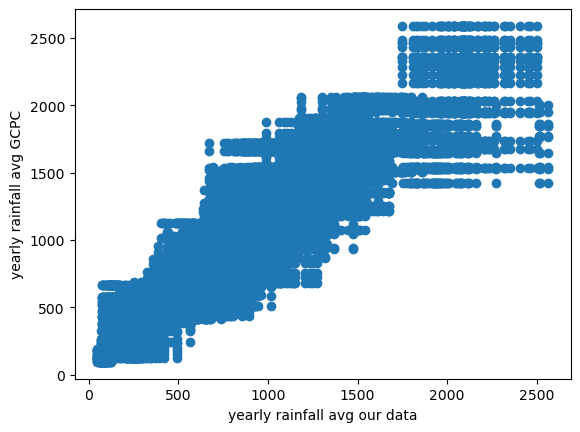

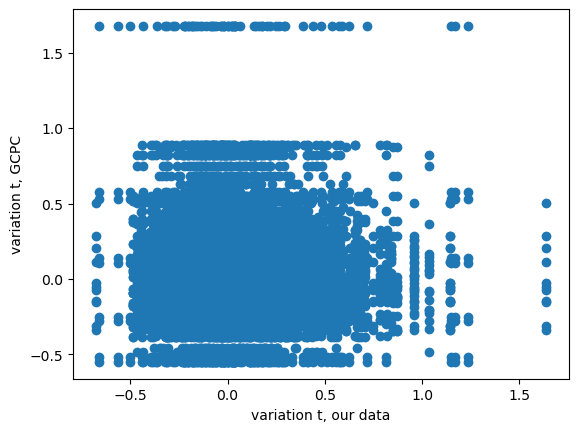

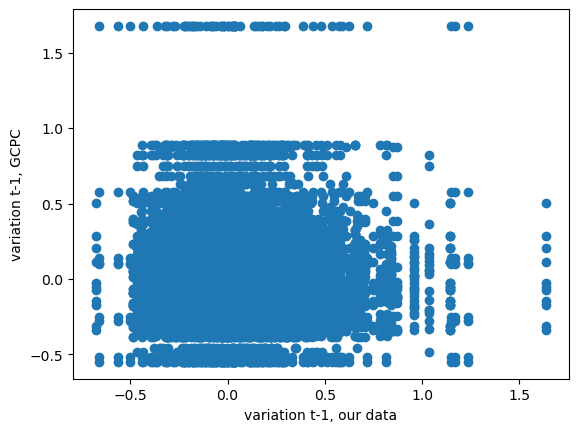

In [40]:
comparsion = our_data.merge(data, on=['country_name'])
plt.scatter(comparsion['yearly_avg_rainfall'], comparsion['GPCP'])
plt.xlabel('yearly rainfall avg our data')
plt.ylabel('yearly rainfall avg GCPC')
plt.show()

plt.scatter(comparsion['rainfall_var_t'], comparsion['GPCP_g'])
plt.xlabel('variation t, our data')
plt.ylabel('variation t, GCPC')
plt.show()

plt.scatter(comparsion['rainfall_var_t_1'], comparsion['GPCP_g_l'])
plt.xlabel('variation t-1, our data')
plt.ylabel('variation t-1, GCPC')
plt.show()

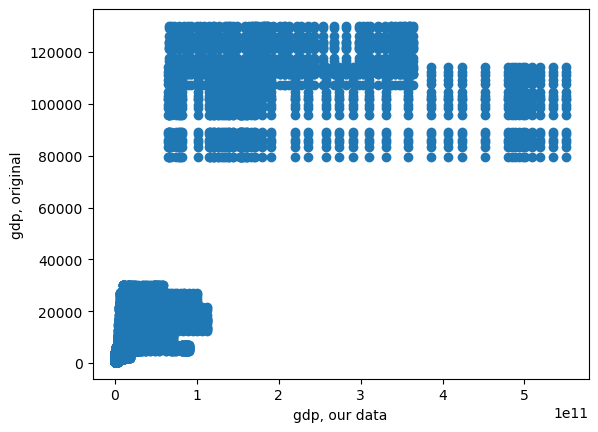

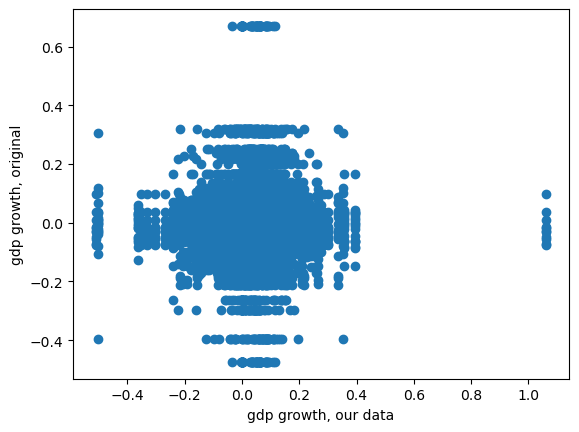

In [39]:
plt.scatter(comparsion['gdp'], comparsion['gdpen']*comparsion['pop'])
plt.xlabel('gdp, our data')
plt.ylabel('gdp, original')
plt.show()

plt.scatter(comparsion['gdp_pchange']/100, comparsion['gdp_g'])
plt.xlabel('gdp growth, our data')
plt.ylabel('gdp growth, original')
plt.show()

In [44]:
feats = ['country_code', 'year', 'gdp_g', 'GPCP_g', 'GPCP_g_l']
relevant_columns = data[feats]
relevant_columns.sample(15)

,country_code,year,gdp_g,GPCP_g,GPCP_g_l
498,NGA,1992,-0.059615,-0.034075,0.047827
34,BEN,1996,0.026480,0.005325,-0.157527
147,TCD,1995,-0.026112,-0.194663,0.632330
460,NAM,1992,-0.005735,-0.547178,0.107803
210,GAB,1990,0.032612,-0.075255,-0.091063
331,KEN,1997,-0.002015,0.890161,-0.135199
28,BEN,1990,-0.001086,-0.211798,0.112880
508,RWA,1983,0.015834,-0.230612,0.282428
607,SDN,1995,0.227088,0.018469,0.036203
324,KEN,1990,-0.003282,-0.041804,0.028486


In [45]:
cols = []
for code in relevant_columns['country_code'].unique():
    relevant_columns[code] = pd.get_dummies(relevant_columns['country_code'])[code]*1
    relevant_columns[f'{code}_year'] = relevant_columns[code] * relevant_columns['year']
    cols.append(code)
    cols.append(f'{code}_year')
relevant_columns.columns

/tmp/ipykernel_625082/3488485838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns[code] = pd.get_dummies(relevant_columns['country_code'])[code]*1
/tmp/ipykernel_625082/3488485838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns[f'{code}_year'] = relevant_columns[code] * relevant_columns['year']
/tmp/ipykernel_625082/3488485838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Index(['country_code', 'year', 'gdp_g', 'GPCP_g', 'GPCP_g_l', 'AGO',
       'AGO_year', 'BEN', 'BEN_year', 'BWA', 'BWA_year', 'BFA', 'BFA_year',
       'BDI', 'BDI_year', 'CMR', 'CMR_year', 'CAF', 'CAF_year', 'TCD',
       'TCD_year', 'COG', 'COG_year', 'DJI', 'DJI_year', 'ETH', 'ETH_year',
       'GAB', 'GAB_year', 'GMB', 'GMB_year', 'GHA', 'GHA_year', 'GIN',
       'GIN_year', 'GNB', 'GNB_year', 'CIV', 'CIV_year', 'KEN', 'KEN_year',
       'LSO', 'LSO_year', 'LBR', 'LBR_year', 'MDG', 'MDG_year', 'MWI',
       'MWI_year', 'MLI', 'MLI_year', 'MRT', 'MRT_year', 'MOZ', 'MOZ_year',
       'NAM', 'NAM_year', 'NER', 'NER_year', 'NGA', 'NGA_year', 'RWA',
       'RWA_year', 'SEN', 'SEN_year', 'SLE', 'SLE_year', 'SOM', 'SOM_year',
       'ZAF', 'ZAF_year', 'SDN', 'SDN_year', 'SWZ', 'SWZ_year', 'TZA',
       'TZA_year', 'TGO', 'TGO_year', 'UGA', 'UGA_year', 'ZAR', 'ZAR_year',
       'ZMB', 'ZMB_year', 'ZWE', 'ZWE_year'],
      dtype='object')

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(relevant_columns, test_size=0.2)
interaction_lr = LinearRegression()

features = ['year', 'GPCP_g', 'GPCP_g_l'] + cols 
target = 'gdp_g'
interaction_lr.fit(train_data[features], train_data[target])
interaction_lr.score(test_data[features], test_data[target])

0.011870040849997654

In [ ]:
interaction_lr.fit(relevant_columns[features], relevant_columns[target])
interaction_lr.score(relevant_columns[features], relevant_columns[target])

0.13255303106453586

In [64]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(relevant_columns[target], interaction_lr.predict(relevant_columns[features]))

0.06580158073650037

Attempt F-test (the following is not currently correct, gotta fix the indicator variables first)

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [83]:
data = {'growth': relevant_columns[target],
        'delta_R_it': relevant_columns['GPCP_g'],
        'delta_R_it_1': relevant_columns['GPCP_g_l'],
        'year': relevant_columns['year']
        }

full_model = smf.ols('growth ~ delta_R_it + delta_R_it_1 + year', data=data).fit()
reduced_model = smf.ols('growth ~ delta_R_it + year', data=data).fit()

f_test = full_model.compare_f_test(reduced_model)

print('F-statistic:', f_test[0])
print('p-value:', f_test[1])

F-statistic: 6.1793437775063875
p-value: 0.013144980976489714


In [84]:
full_model = smf.ols('growth ~ delta_R_it + delta_R_it_1 + year', data=data).fit()
reduced_model = smf.ols('growth ~ delta_R_it + delta_R_it_1', data=data).fit()

f_test = full_model.compare_f_test(reduced_model)

print('F-statistic:', f_test[0])
print('p-value:', f_test[1])

F-statistic: 2.0990185933231587
p-value: 0.14781788890757439


In [85]:
full_model = smf.ols('growth ~ delta_R_it + delta_R_it_1 + year', data=data).fit()
reduced_model = smf.ols('growth ~ delta_R_it_1 + year', data=data).fit()

f_test = full_model.compare_f_test(reduced_model)

print('F-statistic:', f_test[0])
print('p-value:', f_test[1])

F-statistic: 16.757712378964502
p-value: 4.7150945420953324e-05


Feature importances with `f_regression`

In [87]:
from sklearn.feature_selection import f_regression

pp = f_regression(relevant_columns[features], relevant_columns[target])[1]
print(pp)

[1.25910789e-01 7.39510639e-04 3.76145170e-01 6.61114222e-01
 6.60641855e-01 7.72490746e-01 7.70663002e-01 1.12539659e-01
 1.12633278e-01 2.96892994e-01 2.96889561e-01 7.78742111e-01
 7.75643735e-01 8.51702275e-01 8.49958828e-01 6.63078845e-01
 6.64873779e-01 5.41148971e-01 5.43383649e-01 9.46554683e-01
 9.51662160e-01 9.89146872e-01 9.91662016e-01 4.32635651e-01
 4.31695504e-01 6.68335447e-01 6.69882242e-01 6.57005257e-01
 6.59336134e-01 4.89767495e-01 4.87285454e-01 6.83154829e-01
 6.81418360e-01 3.72242830e-01 3.76044559e-01 3.31545537e-01
 3.32998026e-01 7.40485351e-01 7.39844654e-01 5.69499807e-01
 5.69096763e-01 5.12381670e-01 5.11766774e-01 1.83261103e-01
 1.84410769e-01 6.50092634e-01 6.48297103e-01 6.14386212e-01
 6.13422264e-01 6.06183197e-01 6.04962266e-01 4.19402917e-01
 4.16094622e-01 9.20288946e-01 9.19942415e-01 1.97054731e-01
 1.97891005e-01 3.05286711e-01 3.06730925e-01 7.98801816e-01
 7.98266307e-01 6.10656498e-01 6.10140117e-01 1.43987984e-02
 1.42661577e-02 9.620723

In [88]:
for i, val in enumerate(pp):
    if val < 0.05:
        print(features[i], val)

GPCP_g 0.0007395106386864671
SLE 0.014398798414350208
SLE_year 0.01426615769676157
UGA 0.011450270831883007
UGA_year 0.011593385384932861
ZAR 0.011321606583610214
ZAR_year 0.011198788378649368


Standard error

In [102]:
ols = sm.OLS(relevant_columns[target], relevant_columns[features])
ols_result = ols.fit()
ols_result.HC0_se

year        0.000499
GPCP_g      0.014704
GPCP_g_l    0.013175
AGO         4.326978
AGO_year    0.002181
              ...   
ZAR_year    0.002086
ZMB         4.265254
ZMB_year    0.002149
ZWE         3.905515
ZWE_year    0.001980
Length: 85, dtype: float64

In [103]:
ols_result.cov_HC0

array([[ 2.49129199e-07,  8.82162273e-07,  2.33856890e-06, ...,
        -1.39659595e-07, -1.68682646e-04, -1.64570986e-07],
       [ 8.82162273e-07,  2.16213424e-04,  1.00324668e-04, ...,
        -4.94780313e-07,  2.68885219e-03, -2.23597094e-06],
       [ 2.33856890e-06,  1.00324668e-04,  1.73568406e-04, ...,
        -1.12118818e-06,  1.40305931e-03, -3.04912280e-06],
       ...,
       [-1.39659595e-07, -4.94780313e-07, -1.12118818e-06, ...,
         4.61727263e-06,  1.73232875e-04,  5.27852168e-08],
       [-1.68682646e-04,  2.68885219e-03,  1.40305931e-03, ...,
         1.73232875e-04,  1.52530441e+01, -7.48320701e-03],
       [-1.64570986e-07, -2.23597094e-06, -3.04912280e-06, ...,
         5.27852168e-08, -7.48320701e-03,  3.91871016e-06]],
      shape=(85, 85))

In [104]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gdp_g   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.213
Date:                Sat, 05 Apr 2025   Prob (F-statistic):              0.107
Time:                        21:37:24   Log-Likelihood:                 967.51
No. Observations:                 743   AIC:                            -1767.
Df Residuals:                     659   BIC:                            -1380.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0008      0.001      1.372      0.171      -0.000       0.002
GPCP_g         0.0486      0.014      3.508      0.000       0.021       0.076
GPCP_g_l       0.0280      0.014      2.008      0.045       0.001       0.055
AGO            1.2385      5.824      0.213      0.832     -10.198      12.675
AGO_year      -0.0014      0.003     -0.476      0.634      -0.007       0.004
BEN           -4.8626      5.824     -0.835      0.404     -16.299       6.574
BEN_year       0.0017      0.003      0.580      0.562      -0.004       0.007
BWA            1.1646      5.824      0.200      0.842     -10.272      12.601
BWA_year      -0.0013      0.003     -0.458      0.647      -0.007       0.004
BFA            0.2615      5.824      0.045      0.964     -11.175      11.698
BFA_year      -0.0009      0.003     -0.303      0.762      -0.007       0.005
BDI            8.0990      5.826      1.390      0.165      -3.340      19.538
BDI_year      -0.0048      0.003     -1.660      0.097      -0.011       0.001
CMR            4.8782      5.824      0.838      0.403      -6.558      16.314
CMR_year      -0.0032      0.003     -1.104      0.270      -0.009       0.003
CAF           -5.1312      5.824     -0.881      0.379     -16.567       6.304
CAF_year       0.0018      0.003      0.625      0.532      -0.004       0.008
TCD           -5.9781      5.833     -1.025      0.306     -17.433       5.476
TCD_year       0.0022      0.003      0.769      0.442      -0.003       0.008
COG           13.3388      5.825      2.290      0.022       1.900      24.777
COG_year      -0.0075      0.003     -2.565      0.011      -0.013      -0.002
DJI          -29.3243     13.258     -2.212      0.027     -55.356      -3.292
DJI_year       0.0140      0.007      2.143      0.033       0.001       0.027
ETH           -3.5292      5.824     -0.606      0.545     -14.965       7.906
ETH_year       0.0010      0.003      0.351      0.726      -0.005       0.007
GAB           -4.5915      5.825     -0.788      0.431     -16.029       6.846
GAB_year       0.0015      0.003      0.531      0.595      -0.004       0.007
GMB           -7.0344      5.824     -1.208      0.228     -18.470       4.402
GMB_year       0.0028      0.003      0.953      0.341      -0.003       0.008
GHA           -8.0786      5.824     -1.387      0.166     -19.515       3.358
GHA_year       0.0033      0.003      1.137      0.256      -0.002       0.009
GIN           -5.2495      5.824     -0.901      0.368     -16.686       6.187
GIN_year       0.0019      0.003      0.648      0.518      -0.004       0.008
GNB           14.7340      5.824      2.530      0.012       3.297      26.171
GNB_year      -0.0082      0.003     -2.804      0.005      -0.014      -0.002
CIV           -6.1751      5.824     -1.060      0.289     -17.610       5.260
CI